## Best Performing Film Industry Analysis for Business Investment

##   Business Understanding

As part of a company's investments into the entertainment industry, we are exploring the creation of a new movie studio. With no prior Knowledge and experience in film production, it is critical to make data-driven decisions about the types of movies to produce.

The goal is to uncover patterns and insights that will help guide the company's decisions on what types of films to produce for maximum commercial success.

## 1.1 Overview

* A detailed findings of which types of films make the most revenue in the box office.
* Clean and explore the different types of datasets and find out which datasets are best suited for this project.
* Merge the different datasets I have decided to use.
* Communicate insights using visualizations,clearly depicting which types of films the head of the movies studio should create in the new movie studio.
* Formulate a non technical presentation using slides.

## 1.2 Objectives

* Clean, merge, and transform selected datasets into a comprehensive and analysis-ready datasets
* Analyze the relationship between production budget and box office performance to recommend optimal budget ranges for new film projects
* Evaluates and Explore Seasonal Trends in Film Releases
* Determine which film genres consistently generate the highest box office revenues both domestically and internationally.
* Use exploratory data analysis (EDA) and visualizations to identify patterns across  that correlate with higher revenue.
* Present a clear, non-technical summary of findings and visual storytelling in slide format, targeting the studio's leadership and decision-makers.

## Data Understanding

We are working on different types of datasets for variety of movie film industry, covering domestic,foreign and worldwide.
We are going to load the datasets and explore into the datasets check important columns for our data analysis

## Loading Datasets

It is crucial we thoroughly explore each of our datasets and database tables. The datasets we are working with include
* Box office mojo, IMDB, Rotten Tomatoes, TheMovieDB, The Numbers
bs


Data exploration helps us understand the structure, quality, and characteristics of the data we are working with.
By examining distributions, missing values, duplicates, and relationships between variables, we can identify potential issues early and plan our cleaning and transformation strategies more effectively.
This step ensures that our later analyses are based on a solid understanding of the data, reducing the risk of errors and unexpected results.:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Establish a connection to the database
conn = sqlite3.connect('im.db')

# Check available tables (optional, good for understanding structure)
pd.read_sql_query("SELECT * FROM sqlite_master;", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [3]:
#getting the different types of tables
df= pd.read_sql("""
   SELECT *
   FROM sqlite_master
   """
,conn)
df[df['type']=='table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
## showing the columns in movie basics and movie ratings tables
q ="""
   SELECT *
   FROM movie_basics;
"""
pd.read_sql(q,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
q ="""
   SELECT *
   FROM movie_ratings;
"""
pd.read_sql(q,conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
q="""
  SELECT *
  FROM movie_akas
;"""
pd.read_sql(q,conn).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [7]:
# i can join the movie_basics and the movie_ratings table
df_im =pd.read_sql("""
   SELECT *
   FROM movie_basics
   JOIN movie_ratings
   USING (movie_id)
"""
,conn)
df_im

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [8]:
# load the csv file 
bom_df=pd.read_csv("bom.movie_gross.csv")
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
#check the dataset information
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

Since our datasets contain missing values, we are going to clean our dataset by filling the missing values

In [10]:
#checking the null values in the dataset
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
#clean studio column by filling with unknown
bom_df = bom_df.dropna(subset=['studio','domestic_gross'])
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
# clean foreign_gross by filling Null value with replace
bom_df.loc[:, 'foreign_gross'] = bom_df['foreign_gross'].replace(',', '', regex=True)
bom_df.loc[:, 'foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'])
bom_df.loc[:, 'foreign_gross'] = bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].median())
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,19400000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,19400000.0,2018
3384,El Pacto,Sony,2500.0,19400000.0,2018
3385,The Swan,Synergetic,2400.0,19400000.0,2018


In [13]:
#checking if their's still null after cleaning
bom_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [14]:
#checking the number of columns
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [15]:
#loading the csv file
tm_df=pd.read_csv("tmdb.movies.csv")
tm_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [16]:
#checking information about our dataset
tm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [17]:
#checking the null values in the dataset
tm_df.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [18]:
#checking the number of columns
tm_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

The moviedb dataset contains no missing values but we can drop columns we don't want

In [19]:
# dropping columns that are not useful to our analysis
tm_df=tm_df.drop(['original_language','Unnamed: 0','original_title','genre_ids'],axis=1)
tm_df

,id,popularity,release_date,title,vote_average,vote_count
0,12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...
26512,488143,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,485975,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,381231,0.600,2018-10-01,The Last One,0.0,1
26515,366854,0.600,2018-06-22,Trailer Made,0.0,1


In [20]:
# splitting
tm_df['release_date'].str.split('-',n=3,expand=True)

,0,1,2
0,2010,11,19
1,2010,03,26
2,2010,05,07
3,1995,11,22
4,2010,07,16
...,...,...,...
26512,2018,10,13
26513,2018,05,01
26514,2018,10,01
26515,2018,06,22


In [21]:
# renaming the 0 and 1 and 2column
tm_df['release_date'].str.split('-',n=3,expand=True).rename(columns={0:'year',1:'month',2:'date'})

,year,month,date
0,2010,11,19
1,2010,03,26
2,2010,05,07
3,1995,11,22
4,2010,07,16
...,...,...,...
26512,2018,10,13
26513,2018,05,01
26514,2018,10,01
26515,2018,06,22


In [22]:
# returning this to the dataset
tm_df[['year','month','date']]=tm_df['release_date'].str.split('-',n=3,expand=True)
tm_df.head(10)

,id,popularity,release_date,title,vote_average,vote_count,year,month,date
0,12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,19
1,10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,03,26
2,10138,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,05,07
3,862,28.005,1995-11-22,Toy Story,7.9,10174,1995,11,22
4,27205,27.920,2010-07-16,Inception,8.3,22186,2010,07,16
5,32657,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010,02,11
6,19995,26.526,2009-12-18,Avatar,7.4,18676,2009,12,18
7,10193,24.445,2010-06-17,Toy Story 3,7.7,8340,2010,06,17
8,20352,23.673,2010-07-09,Despicable Me,7.2,10057,2010,07,09
9,38055,22.855,2010-11-04,Megamind,6.8,3635,2010,11,04


In [23]:
# let's drop the release_date column and the month_date column since we don't need them
tm_df=tm_df.drop(['release_date','month','date'],axis=1)
tm_df

,id,popularity,title,vote_average,vote_count,year
0,12444,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,10191,28.734,How to Train Your Dragon,7.7,7610,2010
2,10138,28.515,Iron Man 2,6.8,12368,2010
3,862,28.005,Toy Story,7.9,10174,1995
4,27205,27.920,Inception,8.3,22186,2010
...,...,...,...,...,...,...
26512,488143,0.600,Laboratory Conditions,0.0,1,2018
26513,485975,0.600,_EXHIBIT_84xxx_,0.0,1,2018
26514,381231,0.600,The Last One,0.0,1,2018
26515,366854,0.600,Trailer Made,0.0,1,2018


In [24]:
# loading the dataset
tn_df=pd.read_csv("tn.movie_budgets.csv")
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [25]:
#checking for information about dataset
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
# checking for null values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Our dataset is clean and useful in our data analysis as it contains production budget and both domestic and worldwide gross which help us in drawing asumptions about insights

In [27]:
# lets rename movie column to match movie in tn_df
tn_df.rename(columns={'movie':'title'},inplace=True)
tn_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [28]:
# splitting
tn_df['release_date'].str.split(',',n=2,expand=True)

,0,1
0,Dec 18,2009
1,May 20,2011
2,Jun 7,2019
3,May 1,2015
4,Dec 15,2017
...,...,...
5777,Dec 31,2018
5778,Apr 2,1999
5779,Jul 13,2005
5780,Sep 29,2015


In [29]:
# rename the 0 and 1 column
tn_df['release_date'].str.split(',',n=2,expand=True).rename(columns={0:'month_date',1:'year'})

,month_date,year
0,Dec 18,2009
1,May 20,2011
2,Jun 7,2019
3,May 1,2015
4,Dec 15,2017
...,...,...
5777,Dec 31,2018
5778,Apr 2,1999
5779,Jul 13,2005
5780,Sep 29,2015


In [30]:
# returning this to the dataset
tn_df[['month_date','year']]=tn_df['release_date'].str.split(',',n=2,expand=True)
tn_df.head(10)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec 18,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May 20,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun 7,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May 1,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec 15,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",Dec 18,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Apr 27,2018
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",May 24,2007
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",Nov 17,2017
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Nov 6,2015


In [31]:
# let's drop the release_date column and the month_date column since we don't need them
tn_df=tn_df.drop(['release_date','month_date'],axis=1)
tn_df

,id,title,production_budget,domestic_gross,worldwide_gross,year
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0,2018
5778,79,Following,"$6,000","$48,482","$240,495",1999
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,A Plague So Pleasant,"$1,400",$0,$0,2015


In [32]:
#checking for columns
tn_df.columns

Index(['id', 'title', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'year'],
      dtype='object')

Important columns for our analysis giving use important information about movie film industry

In [33]:
#loading the dataset
rt_df=pd.read_csv("rt.movie_info.tsv", delimiter='\t')
rt_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [34]:
# checking for information about dataset
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [35]:
#checking null values
rt_df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [36]:
#checking columns
rt_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [37]:
##dropping columns
rt_df=rt_df.drop(['director','currency','writer','studio','dvd_date','synopsis','theater_date','box_office'],axis=1)
rt_df

,id,rating,genre,runtime
0,1,R,Action and Adventure|Classics|Drama,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,108 minutes
2,5,R,Drama|Musical and Performing Arts,116 minutes
3,6,R,Drama|Mystery and Suspense,128 minutes
4,7,NR,Drama|Romance,200 minutes
...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101 minutes


Now we're going to drop rows containing a low number of missing values

In [38]:
#drop rows
rt_df=rt_df.dropna(subset=['rating','genre','runtime'])
rt_df

,id,rating,genre,runtime
0,1,R,Action and Adventure|Classics|Drama,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,108 minutes
2,5,R,Drama|Musical and Performing Arts,116 minutes
3,6,R,Drama|Mystery and Suspense,128 minutes
4,7,NR,Drama|Romance,200 minutes
...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101 minutes


In [39]:
# Checking whether they're any remaining missing values
rt_df.isnull().sum()

id         0
rating     0
genre      0
runtime    0
dtype: int64

In [40]:
#load the tsv file
r_df=pd.read_csv("rt.reviews.tsv",sep='\t', encoding='ISO-8859-1')
r_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [41]:
#checking information about dataset
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [42]:
# checking null values
r_df.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [43]:
# let's check the number of columns
r_df.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

## Merging the Datasets


let's concat datasets with similar findings,going to merge bom_df and tn_df first since they've similar column names(title, year and domestic gross)

let's combine Two datasets which will help use in drawing useful insights in our Data Analysis

In [44]:
# merging bom_df and tn_df which are different databases
# merge with the same column names

df_m=pd.concat([bom_df,tn_df],ignore_index=True,sort=False)
df_m

,title,studio,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9133,Red 11,NaN,$0,NaN,2018,78.0,"$7,000",$0
9134,Following,NaN,"$48,482",NaN,1999,79.0,"$6,000","$240,495"
9135,Return to the Land of Wonders,NaN,"$1,338",NaN,2005,80.0,"$5,000","$1,338"
9136,A Plague So Pleasant,NaN,$0,NaN,2015,81.0,"$1,400",$0


The merged data contains missing values 

There is correlation between these two datasets so we can fill in some of the missing values by adding and subtracting from the columns,these columns include:domestic_gross, foreign_gross and Worldwide_gross.

We first creates uniformity in our columns in the datasets by removing dollar signs in our data.
We use regex.


### Merged Data Exploration

In [45]:
# regex helps python  understand special characters like dollar sign
df_m['domestic_gross']=df_m['domestic_gross'].replace('[$,]','',regex=True ).astype(float)
df_m.head()

,title,studio,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,NaN,NaN,NaN


In [46]:
# same format
df_m['foreign_gross']=df_m['foreign_gross'].replace('[$,]','',regex=True ).astype(float)
df_m.head()

,title,studio,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,NaN,NaN,NaN


In [47]:
# to align in the same format
df_m['worldwide_gross']=df_m['worldwide_gross'].replace('[$,]','',regex=True ).astype(float)
df_m

,title,studio,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9133,Red 11,NaN,0.0,NaN,2018,78.0,"$7,000",0.0
9134,Following,NaN,48482.0,NaN,1999,79.0,"$6,000",240495.0
9135,Return to the Land of Wonders,NaN,1338.0,NaN,2005,80.0,"$5,000",1338.0
9136,A Plague So Pleasant,NaN,0.0,NaN,2015,81.0,"$1,400",0.0


In [48]:
df_m['production_budget']=df_m['production_budget'].replace('[$,]','',regex=True ).astype(float)
df_m

,title,studio,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9133,Red 11,NaN,0.0,NaN,2018,78.0,7000.0,0.0
9134,Following,NaN,48482.0,NaN,1999,79.0,6000.0,240495.0
9135,Return to the Land of Wonders,NaN,1338.0,NaN,2005,80.0,5000.0,1338.0
9136,A Plague So Pleasant,NaN,0.0,NaN,2015,81.0,1400.0,0.0


In [49]:
# further confirmining if the dollar sign has been removed
df_m.loc[df_m['title']=='Avatar']

,title,studio,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
3356,Avatar,NaN,760507625.0,NaN,2009,1.0,425000000.0,2.776345e+09


## Data cleaning the Missing values in Our merged datasets
* Using adding and subtracting column names. We will clean the missing values in our merged dataset to help use make useful insights.
* We check throughly each columns to ensure no missing values in our final dataset which will give us analysis

In [50]:
df_m['worldwide_gross']=df_m['worldwide_gross'].fillna(df_m['domestic_gross']+ df_m['foreign_gross'])
df_m

,title,studio,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,NaN,NaN,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaN,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaN,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,NaN,NaN,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,NaN,NaN,7.526000e+08
...,...,...,...,...,...,...,...,...
9133,Red 11,NaN,0.0,NaN,2018,78.0,7000.0,0.000000e+00
9134,Following,NaN,48482.0,NaN,1999,79.0,6000.0,2.404950e+05
9135,Return to the Land of Wonders,NaN,1338.0,NaN,2005,80.0,5000.0,1.338000e+03
9136,A Plague So Pleasant,NaN,0.0,NaN,2015,81.0,1400.0,0.000000e+00


In [51]:
## filling in the foreign gross
df_m['foreign_gross']=df_m['foreign_gross'].fillna( df_m['worldwide_gross']-df_m['domestic_gross'])
df_m

,title,studio,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,NaN,NaN,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaN,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaN,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,NaN,NaN,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,NaN,NaN,7.526000e+08
...,...,...,...,...,...,...,...,...
9133,Red 11,NaN,0.0,0.0,2018,78.0,7000.0,0.000000e+00
9134,Following,NaN,48482.0,192013.0,1999,79.0,6000.0,2.404950e+05
9135,Return to the Land of Wonders,NaN,1338.0,0.0,2005,80.0,5000.0,1.338000e+03
9136,A Plague So Pleasant,NaN,0.0,0.0,2015,81.0,1400.0,0.000000e+00


In [52]:
#checking the null values
df_m.isnull().sum()

title                   0
studio               5782
domestic_gross          0
foreign_gross           0
year                    0
id                   3356
production_budget    3356
worldwide_gross         0
dtype: int64

In [53]:
#i can drop studio and id columns
df_m=df_m.drop(['studio','id'],axis=1)
df_m

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,NaN,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,NaN,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,NaN,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,NaN,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,NaN,7.526000e+08
...,...,...,...,...,...,...
9133,Red 11,0.0,0.0,2018,7000.0,0.000000e+00
9134,Following,48482.0,192013.0,1999,6000.0,2.404950e+05
9135,Return to the Land of Wonders,1338.0,0.0,2005,5000.0,1.338000e+03
9136,A Plague So Pleasant,0.0,0.0,2015,1400.0,0.000000e+00


In [54]:
# checking the value couns
df_m['production_budget'].value_counts()

production_budget
20000000.0    231
10000000.0    212
30000000.0    177
15000000.0    173
25000000.0    171
             ... 
13900000.0      1
14200000.0      1
14400000.0      1
14600000.0      1
1100.0          1
Name: count, Length: 509, dtype: int64

In [55]:
# checking the median
df_m['production_budget'].median()

17000000.0

In [56]:
# replacing the null values in production budget with the median
df_m['production_budget']=df_m['production_budget'].fillna(df_m['production_budget'].median())
df_m


,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,17000000.0,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,17000000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,17000000.0,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,17000000.0,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,17000000.0,7.526000e+08
...,...,...,...,...,...,...
9133,Red 11,0.0,0.0,2018,7000.0,0.000000e+00
9134,Following,48482.0,192013.0,1999,6000.0,2.404950e+05
9135,Return to the Land of Wonders,1338.0,0.0,2005,5000.0,1.338000e+03
9136,A Plague So Pleasant,0.0,0.0,2015,1400.0,0.000000e+00


In [57]:
#checking the null
df_m.isnull().sum()

title                0
domestic_gross       0
foreign_gross        0
year                 0
production_budget    0
worldwide_gross      0
dtype: int64

In [58]:
# Check how many duplicate rows exist
df_m.duplicated(subset=['title']).sum()

1320

In [59]:
# cleaning the duplicates
df_m = df_m.drop_duplicates(subset=['title'], keep='first')
df_m

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,17000000.0,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,17000000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,17000000.0,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,17000000.0,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,17000000.0,7.526000e+08
...,...,...,...,...,...,...
9133,Red 11,0.0,0.0,2018,7000.0,0.000000e+00
9134,Following,48482.0,192013.0,1999,6000.0,2.404950e+05
9135,Return to the Land of Wonders,1338.0,0.0,2005,5000.0,1.338000e+03
9136,A Plague So Pleasant,0.0,0.0,2015,1400.0,0.000000e+00


In [60]:
#check if dublicates still exist
df_m.duplicated(subset=['title']).sum()

0

Our merged dataset df_m columns and rows has no dublicates now 

In [61]:
# merging df_m and tm_df
#using sort  argument inorder to keep the original order
df_A=pd.concat([tm_df,df_m],ignore_index=True,sort=False)
df_A

,id,popularity,title,vote_average,vote_count,year,domestic_gross,foreign_gross,production_budget,worldwide_gross
0,12444.0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,2010,NaN,NaN,NaN,NaN
1,10191.0,28.734,How to Train Your Dragon,7.7,7610.0,2010,NaN,NaN,NaN,NaN
2,10138.0,28.515,Iron Man 2,6.8,12368.0,2010,NaN,NaN,NaN,NaN
3,862.0,28.005,Toy Story,7.9,10174.0,1995,NaN,NaN,NaN,NaN
4,27205.0,27.920,Inception,8.3,22186.0,2010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
34330,NaN,NaN,Red 11,NaN,NaN,2018,0.0,0.0,7000.0,0.0
34331,NaN,NaN,Following,NaN,NaN,1999,48482.0,192013.0,6000.0,240495.0
34332,NaN,NaN,Return to the Land of Wonders,NaN,NaN,2005,1338.0,0.0,5000.0,1338.0
34333,NaN,NaN,A Plague So Pleasant,NaN,NaN,2015,0.0,0.0,1400.0,0.0


In [62]:
df_A.isnull().sum()

id                    7818
popularity            7818
title                    0
vote_average          7818
vote_count            7818
year                     0
domestic_gross       26517
foreign_gross        26517
production_budget    26517
worldwide_gross      26517
dtype: int64






From df_A, I can conclude that With 26,517 missing values out of 35,655 rows for domestic_gross, foreign_gross, production_budget, and worldwide_gross, approximately 74.4% of your financial data is absent.
This is extremely large amount of missing data which makes it extremely difficult to conduct meaningful analysis on profitability,Relationship between budget/gross and other metrics like popularity or vote average.
Thus i will not consider using this merged dataset.

In [63]:
# trying merging df_m and rt_df
df_B=pd.concat([rt_df,df_m],ignore_index=True,sort=False)
df_B

,id,rating,genre,runtime,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross
0,1.0,R,Action and Adventure|Classics|Drama,104 minutes,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,R,Drama|Science Fiction and Fantasy,108 minutes,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,R,Drama|Musical and Performing Arts,116 minutes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,R,Drama|Mystery and Suspense,128 minutes,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,NR,Drama|Romance,200 minutes,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9339,NaN,NaN,NaN,NaN,Red 11,0.0,0.0,2018,7000.0,0.0
9340,NaN,NaN,NaN,NaN,Following,48482.0,192013.0,1999,6000.0,240495.0
9341,NaN,NaN,NaN,NaN,Return to the Land of Wonders,1338.0,0.0,2005,5000.0,1338.0
9342,NaN,NaN,NaN,NaN,A Plague So Pleasant,0.0,0.0,2015,1400.0,0.0


In [64]:
df_B.isnull().sum()

id                   7818
rating               7818
genre                7818
runtime              7818
title                1526
domestic_gross       1526
foreign_gross        1526
year                 1526
production_budget    1526
worldwide_gross      1526
dtype: int64

After joining the third dataset(rt_df) with the two merged dataset still contains alot of missing values.
Since we don't want biased data and inefficiency in data preprocessing and avoiding challenges in Data imputation, we will not use this datasets.

After alot of investigation i have to a conclusion that i will use the two merged dataset(df_m) which has high correlation for my analysis.

so our merged-data will be (df_m) which i will give it a variable merged_df

In [65]:
#merged two datasets ([bom_df,tn_df])
merged_df = df_m
merged_df

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,17000000.0,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,17000000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,17000000.0,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,17000000.0,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,17000000.0,7.526000e+08
...,...,...,...,...,...,...
9133,Red 11,0.0,0.0,2018,7000.0,0.000000e+00
9134,Following,48482.0,192013.0,1999,6000.0,2.404950e+05
9135,Return to the Land of Wonders,1338.0,0.0,2005,5000.0,1.338000e+03
9136,A Plague So Pleasant,0.0,0.0,2015,1400.0,0.000000e+00


Our merged_df has 7818 rows and 6 columns.
We are going to use this merged dataset to draw conclusion and make best films performing insights

In [66]:
# checking for null values
merged_df.isnull().sum()

title                0
domestic_gross       0
foreign_gross        0
year                 0
production_budget    0
worldwide_gross      0
dtype: int64

Our Merged dataset is now clean and contains no missing values. We are going to use it to make our analysis

In [67]:
#lets create another profit/loss column
#Making sure am working with a real copy
merged_df = merged_df.copy()
merged_df['profit_loss'] = merged_df['worldwide_gross'] - merged_df['production_budget']
merged_df.head()


,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
0,Toy Story 3,415000000.0,652000000.0,2010,17000000.0,1.067000e+09,1.050000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,17000000.0,1.025500e+09,1.008500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,17000000.0,9.603000e+08,9.433000e+08
3,Inception,292600000.0,535700000.0,2010,17000000.0,8.283000e+08,8.113000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,17000000.0,7.526000e+08,7.356000e+08


In [68]:
#checking the first 15 data
merged_df.head(15)

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
0,Toy Story 3,415000000.0,652000000.0,2010,17000000.0,1.067000e+09,1.050000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,17000000.0,1.025500e+09,1.008500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,17000000.0,9.603000e+08,9.433000e+08
3,Inception,292600000.0,535700000.0,2010,17000000.0,8.283000e+08,8.113000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,17000000.0,7.526000e+08,7.356000e+08
5,The Twilight Saga: Eclipse,300500000.0,398000000.0,2010,17000000.0,6.985000e+08,6.815000e+08
6,Iron Man 2,312400000.0,311500000.0,2010,17000000.0,6.239000e+08,6.069000e+08
7,Tangled,200800000.0,391000000.0,2010,17000000.0,5.918000e+08,5.748000e+08
8,Despicable Me,251500000.0,291600000.0,2010,17000000.0,5.431000e+08,5.261000e+08
9,How to Train Your Dragon,217600000.0,277300000.0,2010,17000000.0,4.949000e+08,4.779000e+08


In [69]:
merged_df.columns


Index(['title', 'domestic_gross', 'foreign_gross', 'year', 'production_budget',
       'worldwide_gross', 'profit_loss'],
      dtype='object')

In [70]:
merged_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, ' 2009',
       ' 2019', ' 2017', ' 2015', ' 2007', ' 2006', ' 2008', ' 2012',
       ' 2005', ' 1997', ' 2004', ' 2010', ' 2013', ' 2016', ' 2018',
       ' 1999', ' 1995', ' 2003', ' 2011', ' 2014', ' 2001', ' 2020',
       ' 2002', ' 1998', ' 2000', ' 1991', ' 1994', ' 1996', ' 1993',
       ' 1992', ' 1988', ' 1990', ' 1989', ' 1978', ' 1981', ' 1984',
       ' 1982', ' 1985', ' 1980', ' 1963', ' 1987', ' 1986', ' 1983',
       ' 1979', ' 1977', ' 1970', ' 1969', ' 1965', ' 1962', ' 1964',
       ' 1966', ' 1974', ' 1956', ' 1975', ' 1973', ' 1960', ' 1968',
       ' 1967', ' 1971', ' 1951', ' 1972', ' 1976', ' 1961', ' 1946',
       ' 1944', ' 1953', ' 1954', ' 1957', ' 1959', ' 1952', ' 1930',
       ' 1939', ' 1925', ' 1950', ' 1948', ' 1958', ' 1943', ' 1940',
       ' 1945', ' 1947', ' 1938', ' 1927', ' 1949', ' 1955', ' 1936',
       ' 1937', ' 1941', ' 1942', ' 1935', ' 1931', ' 1933', ' 1916',
       ' 1929', ' 19

In [71]:
print(merged_df['year'].isna().sum())  # should return 0


0


We now convert our merged datasets back to a csv file which we will use in Tableau for interactive dashboards for our film industry analysis.

In [72]:
# Saving our merged dataset to a csv file
merged_df.to_csv("cleaned_movie_data.csv", index=False)
merged_df

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
0,Toy Story 3,415000000.0,652000000.0,2010,17000000.0,1.067000e+09,1.050000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,17000000.0,1.025500e+09,1.008500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,17000000.0,9.603000e+08,9.433000e+08
3,Inception,292600000.0,535700000.0,2010,17000000.0,8.283000e+08,8.113000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,17000000.0,7.526000e+08,7.356000e+08
...,...,...,...,...,...,...,...
9133,Red 11,0.0,0.0,2018,7000.0,0.000000e+00,-7.000000e+03
9134,Following,48482.0,192013.0,1999,6000.0,2.404950e+05,2.344950e+05
9135,Return to the Land of Wonders,1338.0,0.0,2005,5000.0,1.338000e+03,-3.662000e+03
9136,A Plague So Pleasant,0.0,0.0,2015,1400.0,0.000000e+00,-1.400000e+03


## Data Analysis And Visualization

We are going to make data analysis based on our visualizations in our merged dataset.We will them make observations based on different aspect of analysis.Check on Domestic,foreign and Worldwide gross, profit and loss in the film industry and production cost which will give useful findings.

## Top Movie Release by Year

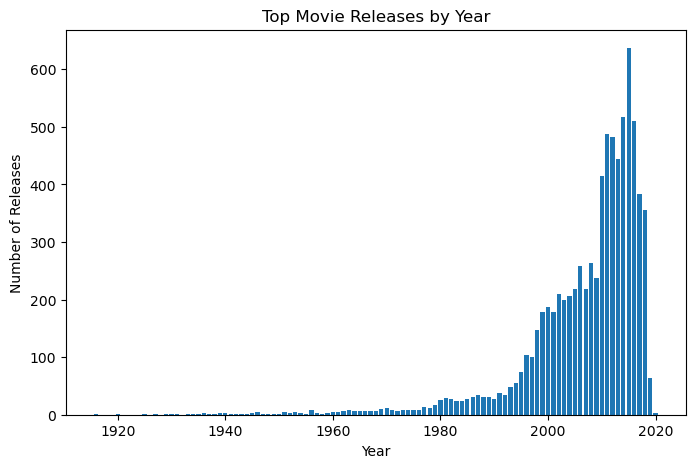

In [73]:
merged_df['year'] = merged_df['year'].astype(int)
year_counts = merged_df['year'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,5))
x = list(year_counts.index)
y = list(year_counts.values)
ax.bar(x, y)
ax.set_title('Top Movie Releases by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Releases')
plt.show()


* The number of movie release from the Graph has been steadily increasing over a long period of time.This suggest that the movie Film industry has been thriving well in the last decades.

* Early 1920-1940, their was low movie release while from 2000, the number of movie releases has been increasing consistency.
* This show positive  impact to Film industry stakeholders as their is market in the Movie film industry for new investors.

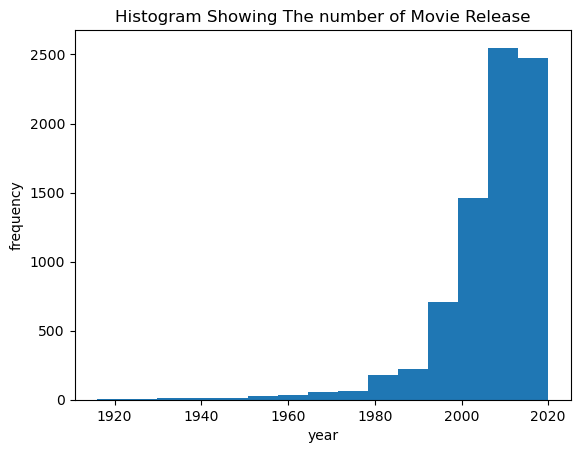

In [74]:
x=merged_df['year']
plt.hist(x,bins=15)
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('Histogram Showing The number of Movie Release')
plt.show()

* From the above Histogram, we clearly see that the Movie Film industry has been growing in size gradually over centuries.
* Their is low or almost zero number of movies around 1920 while between 2010-2020 their has relative increase in movie release showing the business has been doing well over the years.
* From the Graph, it indicates that their is a little risk for the new film in the movie market 

## Top Movies by Gross Earnings

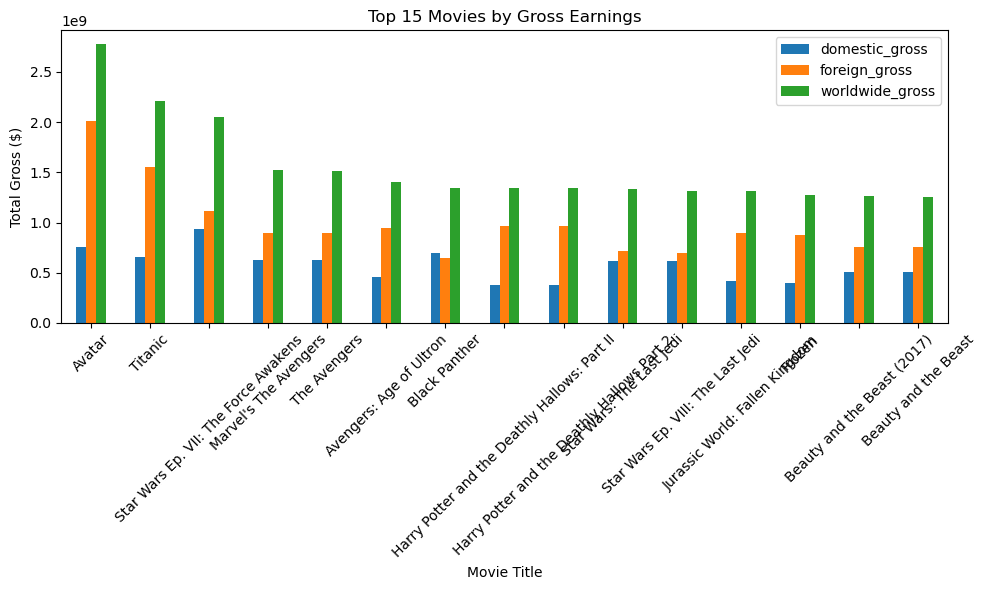

In [75]:
merged_df.groupby(['title'])[['domestic_gross', 'foreign_gross', 'worldwide_gross']].sum().sort_values(
    by='worldwide_gross', ascending=False).head(15).plot(kind='bar', figsize=(10,6))

plt.title('Top 15 Movies by Gross Earnings')
plt.xlabel('Movie Title')
plt.ylabel('Total Gross ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* From the Graph above, we can conclude that Avatar tops the table with the most Gross Earnings in the movie film industry, with a profit margin of  (2351345000 million dollars) gross profit.
* Avatar movie made a total of (2776345000 million dollars) worldwide gross earnings.
* Titanic movie made a total worldwide earnings of (2208208000 million dollars) making it the second in gross earnings.
* Beauty and the Beast recorded a total earnings of (1259200000 million dollars) making less gross earning compared to Avatar.

In [76]:
merged_df.loc[merged_df['title']=='Avatar']

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
3356,Avatar,760507625.0,2.015838e+09,2009,425000000.0,2.776345e+09,2.351345e+09


## Domestic and Foreign Gross by Top Movies

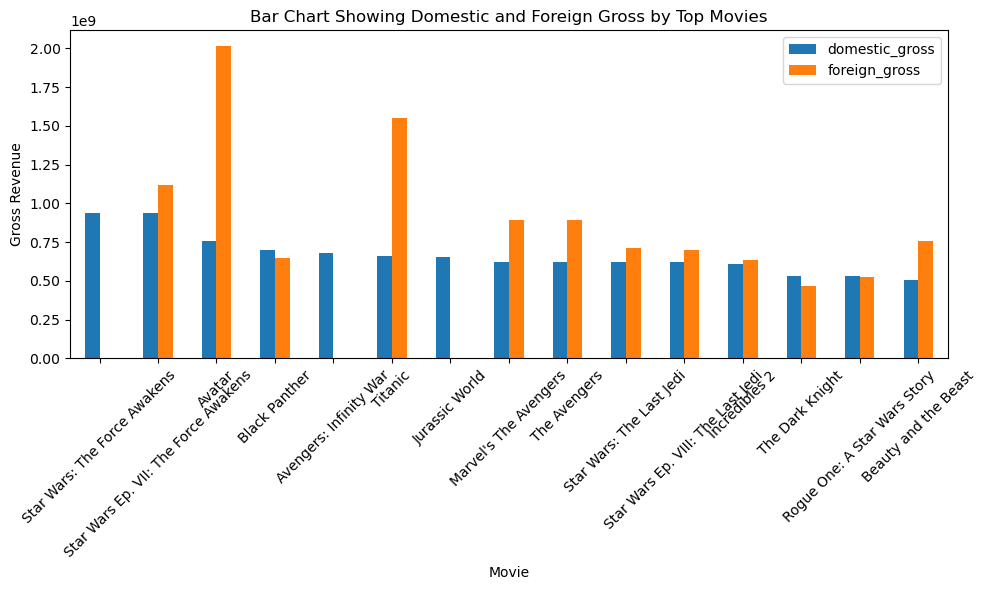

In [77]:

merged_df.groupby(['title'])[['domestic_gross', 'foreign_gross']].sum().sort_values(by='domestic_gross', ascending=False).head(15).plot(kind='bar', figsize=(10, 6))
    
plt.title('Bar Chart Showing Domestic and Foreign Gross by Top Movies')
plt.xlabel('Movie')
plt.ylabel('Gross Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



* Checking on the margins between Domestic and Foreign gross, foreign gross by top movie slightly  dominated over domestic.
* Our top movie, Star Wars Ep. VII: The Force Awakens had relatively highest Foreign gross of (1116649000 dollars) with a merged profit of (1747311000)
  proving that it yielded the most foreign and worldwide gross of (2053311000).
* Majority of the movie had forieign gross dominating the domestic gross.

In [78]:
merged_df.loc[merged_df['title']=='Star Wars Ep. VII: The Force Awakens']

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
3361,Star Wars Ep. VII: The Force Awakens,936662225.0,1.116649e+09,2015,306000000.0,2.053311e+09,1.747311e+09


## Revenue Made by Movies

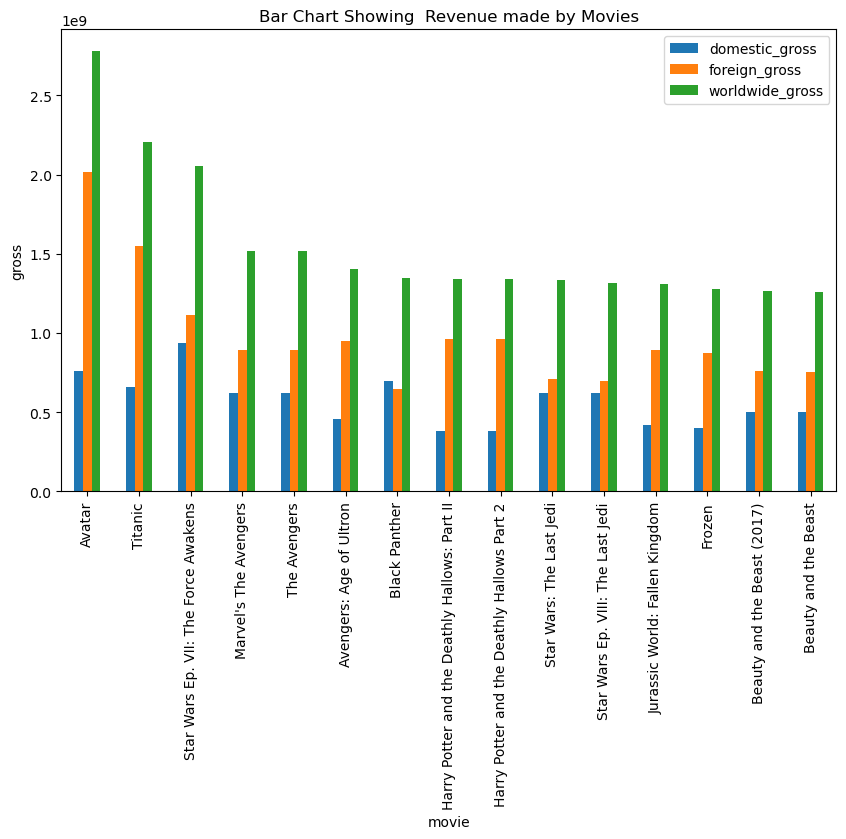

In [79]:
##slicing the title column
merged_df.groupby(['title'])[['domestic_gross','foreign_gross','worldwide_gross']].sum().sort_values(by='worldwide_gross',ascending=False).head(15).plot(kind = 'bar',figsize = (10,6))
plt.title('Bar Chart Showing  Revenue made by Movies')
plt.xlabel('movie')
plt.ylabel('gross')
plt.show();

In [80]:
merged_df.loc[merged_df['title']=='Titanic']

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
3398,Titanic,659363944.0,1.548844e+09,1997,200000000.0,2.208208e+09,2.008208e+09


* Avatar leads with most Revenues mades by movies having the highest worldwide gross revenue of (2776345000)and domestic of (760507625) and a profit of (2351345000).
* Titanic annually generated most revenues after Avatar having yielded a worldwide gross of (2208208000) and a profit of (2008208000)
* Majority of the movie films generated revenues both domestic,foreign and worldwide.

* Based on generated revenues, i will mentor new head film to venture into a high generating revenue movie films 
  

## Production Budget

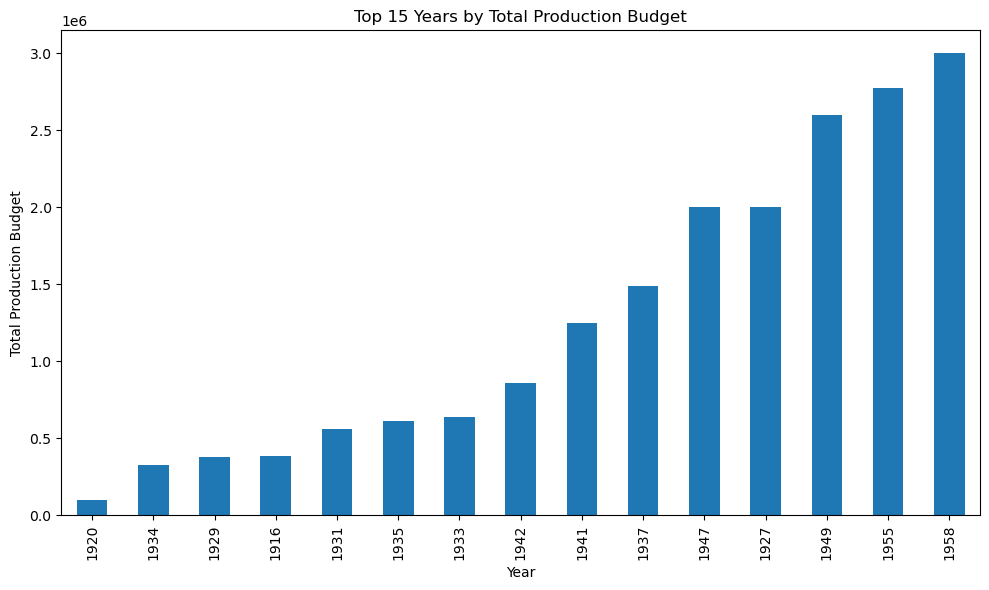

In [81]:
merged_df.groupby(['year'])['production_budget'].sum().sort_values(ascending=True).head(15).plot(kind='bar', figsize=(10, 6))

plt.title('Top 15 Years by Total Production Budget')
plt.xlabel('Year')
plt.ylabel('Total Production Budget')
plt.tight_layout()
plt.show()


* From the Graph we conclude that majority movie industry is growing and thriving steadily with time(years).
* There is a relative increase in production budget over the years meaning that cost of production is continuously increasing with time.
* For a new movie firm should expect a cost of movie production from the trend above.
  

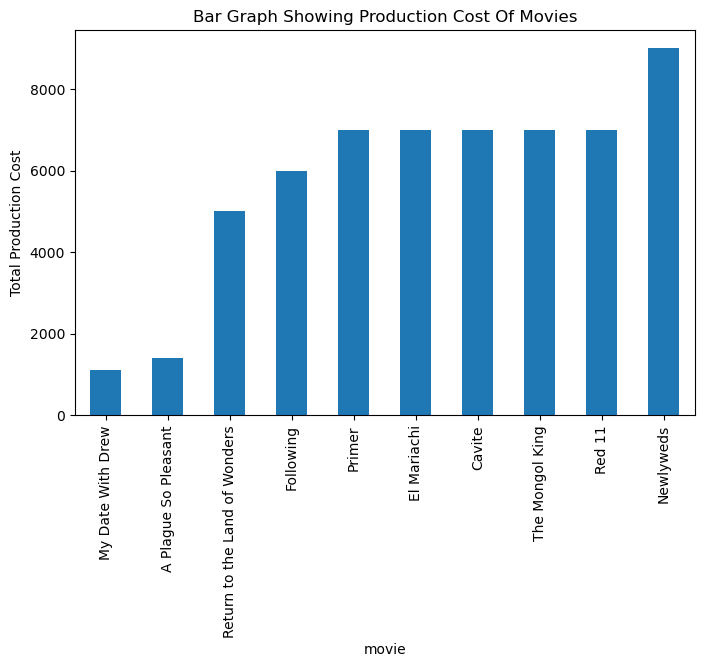

In [82]:
merged_df.groupby(['title'])['production_budget'].sum().sort_values(ascending=True).head(10).plot(kind='bar', figsize=(8,5))

plt.title('Bar Graph Showing Production Cost Of Movies')
plt.xlabel('movie')
plt.ylabel('Total Production Cost')
plt.show();


In [83]:
merged_df.loc[merged_df['title']=='Red 11']

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
9133,Red 11,0.0,0.0,2018,7000.0,0.0,-7000.0


* Majority of the movie films that had a low budget cost managed also to make a  good profit.
* Based on this i will advice the new film manager/head to also consider being cost effective as it also reduces production cost and yields profit cost.
* My Date With Drew had a very low production budget(1100) but made a profit(179941)
* Newlyweds made a loss of(4416) despite having high production budget of(9000)
* El Mariachi made a profit of (2034928) having a minimal production cost of (7000).

### Productions Time Frame

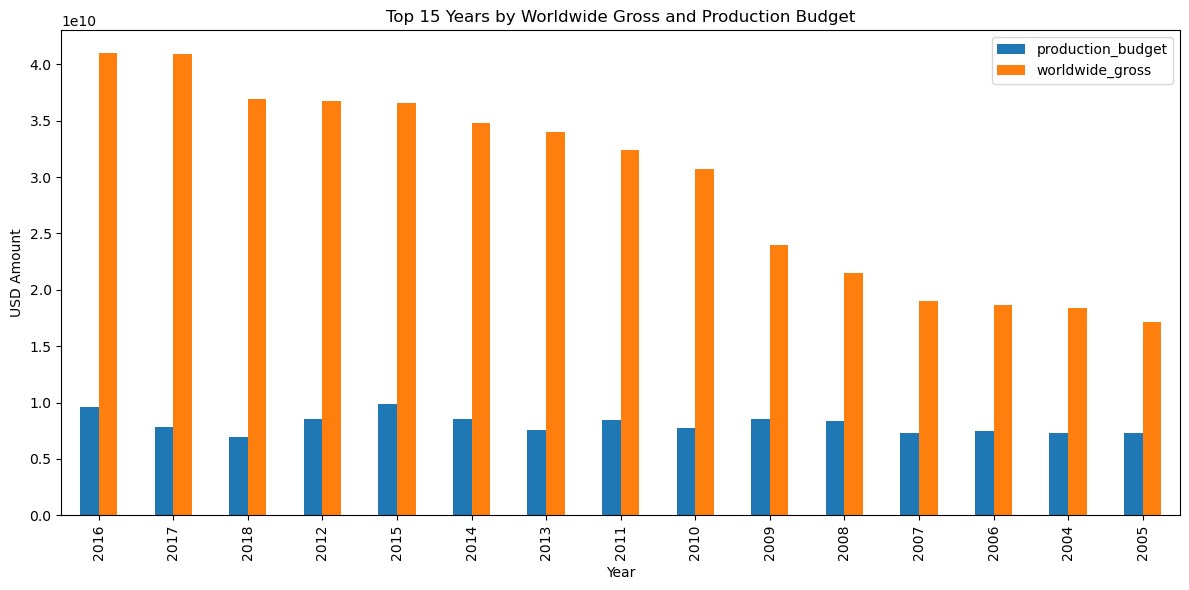

In [84]:
merged_df.groupby('year')[['production_budget', 'worldwide_gross']].sum().sort_values(by='worldwide_gross', ascending=False).head(15).plot(kind='bar', figsize=(12, 6))

plt.title('Top 15 Years by Worldwide Gross and Production Budget')
plt.xlabel('Year')
plt.ylabel('USD Amount')
plt.tight_layout()
plt.show()


* The Worldwide gross is much higher than Production budget a good indicator of thriving business.
*  From 2000-2020 there have been steady increase in production of movies based on worldwide gross income.
* This implement a good progress worldwide in production of movie films.
* In 2016 we had a large number of worldwide movie production producing large number of movies.
* From the Graph,it's a good time to venture into movie film market now considering the steady growth in the industry over time.

In [85]:
merged_df.loc[merged_df['year']==2016]

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
2295,Captain America: Civil War,408100000.0,745200000.0,2016,17000000.0,1.153300e+09,1.136300e+09
2296,Rogue One: A Star Wars Story,532200000.0,523900000.0,2016,17000000.0,1.056100e+09,1.039100e+09
2297,Finding Dory,486300000.0,542300000.0,2016,17000000.0,1.028600e+09,1.011600e+09
2298,Zootopia,341300000.0,682500000.0,2016,17000000.0,1.023800e+09,1.006800e+09
2299,The Jungle Book (2016),364000000.0,602500000.0,2016,17000000.0,9.665000e+08,9.495000e+08
...,...,...,...,...,...,...,...
8694,Meet the Blacks,9097072.0,0.0,2016,900000.0,9.097072e+06,8.197072e+06
8741,Adulterers,0.0,0.0,2016,750000.0,0.000000e+00,-7.500000e+05
9006,The Fits,166425.0,2817.0,2016,170000.0,1.692420e+05,-7.580000e+02
9031,Une Femme MariÃ©e,0.0,0.0,2016,120000.0,0.000000e+00,-1.200000e+05


### Profit and Loss Made by Movies

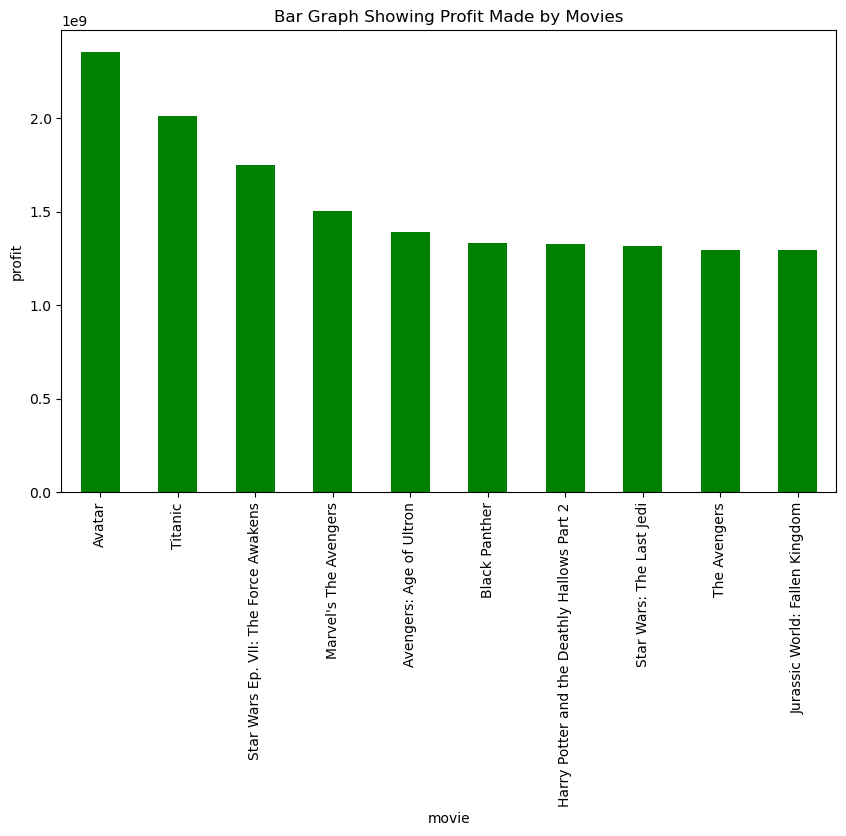

In [86]:
merged_df.groupby(['title'])['profit_loss'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='green', figsize=(10,6))

plt.title('Bar Graph Showing Profit Made by Movies')
plt.xlabel('movie')
plt.ylabel('profit')
plt.show();

* Avatar and Titanic tops the list with the most relatively high rpofits mades by the movie film.
* Avatar tops with a gross profit margin of(2351345000) recording the highest profit indicating that the film made a lot of sells worldwide.
* Titanic also made a huge profit in the industry with a margin of(2008208000) indicating a positive return on investment.
* Jurassic World: Fallen Kingdom also had a profit margin of(1292500000).
*Generally i will encourage my new head to invest on the film that yields the highest profit return in future.

In [87]:
merged_df.loc[merged_df['title']=='Jurassic World: Fallen Kingdom']

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
3050,Jurassic World: Fallen Kingdom,417700000.0,891800000.0,2018,17000000.0,1.309500e+09,1.292500e+09


### Distribution of Loss Made by Movie

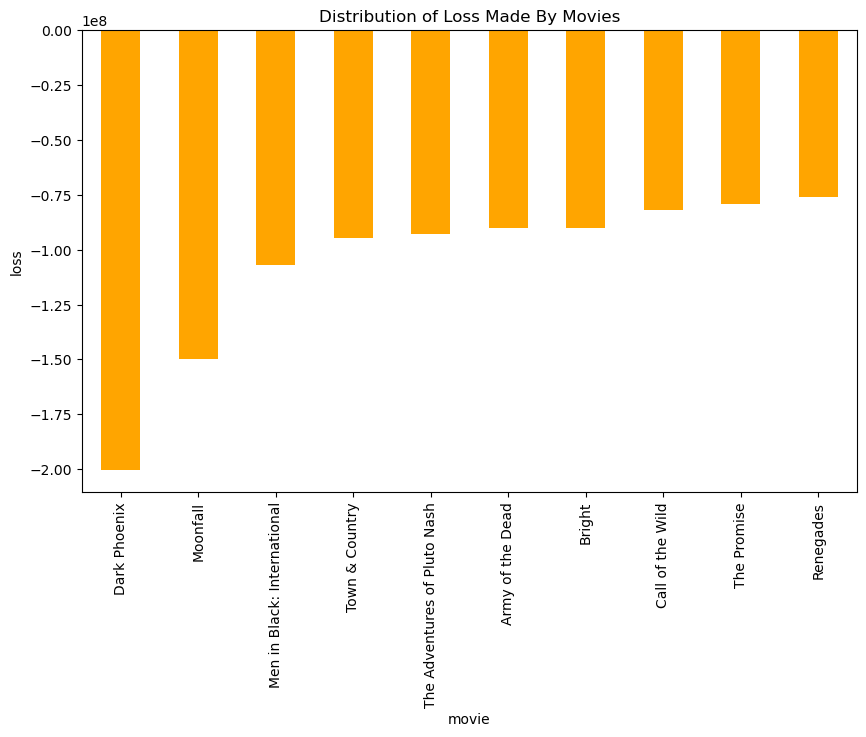

In [88]:
merged_df.groupby(['title'])['profit_loss'].sum().sort_values(ascending=True).head(10).plot(kind='bar',color='orange', figsize=(10,6))

plt.title('Distribution of Loss Made By Movies')
plt.xlabel('movie')
plt.ylabel('loss')
plt.show();

* From above, The movie which made the most losses in the movie film industry was Dark Phoenix with loss amounting(200237650 million dollars) which is an action/sci-fi film.
* From top 10 list majority of the movies that made the losses are action movies indicating that they should work on the needs of audience since at times acton movie are very popular worldwide.
* I would advice my new head of movie to create film based on audience preference and hire people who knows the taste or needs of the audiences.
* Renegades also made a loss of (75978328)
* For my new film investor, i will focus on film with lowest risk of loss thus yielding the best returns

In [89]:
merged_df.loc[merged_df['title']=='Renegades']

,title,domestic_gross,foreign_gross,year,production_budget,worldwide_gross,profit_loss
3975,Renegades,0.0,1521672.0,2019,77500000.0,1521672.0,-75978328.0


## Business Recommendations

Venturing into the entertainment industry requires informed, strategic investments. Our data-driven analysis of global movie trends reveals clear patterns in genre performance, language appeal, and creative talent that can guide profitable decision-making. This section outlines actionable recommendations to minimize risk and build a sustainable, high-growth production portfolio.



### Focus on High-Impact Genres

Findings:


Highest Ratings: Documentary, Classics, Anime & Manga earn consistent acclaim.
Strong ROI: Cult Films, Horror, and Documentaries yield the best returns on lower budgets.
Niche Wins: Genres like Special Interest and Musical & Performing Arts excel in targeted segments.
Weak Performers: Faith & Spirituality and Westerns generally underdeliver in ratings ng appeal.


### Recomendations:
Prioritize genres with both critical and commercial strength (e.g., Documentaries, Cult Films).
Use low-budget, high-ROI genres (e.g., Horror) for early-phase projects.
Avoid low-impact genres unless justified by unique branding or demand.
Explore genre hybrids to innovate while retaining appeal.


### Language Strategy for Global Reach

Findings:

English dominates global cinema.
French, Spanish, Japanese, and Russian have strong regional influence.

### Recommendations:Start with English-language films to maximize global reach.
Plan multilingual or subtitled releases to expand into regional markets.
Adapt to language trends to stay competitive in evolving markets.


Collaborate with or learn from high-grossing directors to fast-track success.
Use director branding as a marketing asset to attract audiences and investors.
Scout emerging talent with similar creative styles to balance cost and quality.
Track director performance over time to identify long-term value creators.

## Limitations of Our Analysis
While our analysis offers valuable insights, several limitations and areas for further exploration remain. Addressing these would strengthen the accuracy and strategic impact of future recommendations.

Dataset Coverage and Bias: Some genres, directors, and languages were underrepresented due to sampling biases and incomplete data. This limits the generalizability of our findings.

Assumed Correlations: We assumed a strong relationship between ratings, popularity, and ROI—without access to verified financial return data. Future analyses should incorporate actual revenue or profit data for validation.

Genre Attribution Methodology: For movies tagged with multiple genres, we treated all genres as equally contributing to outcomes like ratings and ROI. More nuanced weighting methods could offer deeper insights.

Lack of Metadata Definitions: Some variables (e.g., "popularity") lacked documentation, requiring interpretive assumptions. This could affect the reliability of language or trend-related conclusions.

Data Integration Constraints: Inconsistent identifiers across datasets restricted our ability to join and cross-reference deeper relationships (e.g., between directors and genre-specific success).

## Further Areas for Consideration
To enhance the decision-making framework, we as the analysts plan to also consider:

Audience demographics and regional preferences for finer segmentation.
Marketing budgets and distribution channels, which significantly impact ROI.
Talent performance beyond directors—such as writers, lead actors, and producers.
Temporal trends (e.g., pre- vs. post-pandemic shifts) to detect changes in consumer behavior.